1. Import Libraries & Data


In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# suppress scientific notation
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df = pd.read_csv('/Users/kiano/Downloads/Data Analysis portfolio /eCommerce purchase history from electronics store/kz.csv')
df.head()

event_time             order_id           product_id  \
0  2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
1  2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
2  2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
3  2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
4  2020-04-24 19:16:21 UTC  2294584263154074236  2273948316817424439   

             category_id                category_code    brand  price  \
0 2268105426648171008.00           electronics.tablet  samsung 162.01   
1 2268105426648171008.00           electronics.tablet  samsung 162.01   
2 2268105430162997760.00  electronics.audio.headphone   huawei  77.52   
3 2268105430162997760.00  electronics.audio.headphone   huawei  77.52   
4 2268105471367840000.00                          NaN  karcher 217.57   

                 user_id  
0 1515915625441993984.00  
1 1515915625441993984.00  
2 1515915625447879424.00  
3 1515915625447879424.00  
4 1515915625443148032.00

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


In [88]:
df.describe(include='all').T

count   unique                      top    freq  \
event_time       2633521  1316174  1970-01-01 00:33:40 UTC   19631   
order_id      2633521.00      NaN                      NaN     NaN   
product_id    2633521.00      NaN                      NaN     NaN   
category_id   2201567.00      NaN                      NaN     NaN   
category_code    2021319      510   electronics.smartphone  357682   
brand            2127516    23021                  samsung  358928   
price         2201567.00      NaN                      NaN     NaN   
user_id        564169.00      NaN                      NaN     NaN   

                                mean                   std  \
event_time                       NaN                   NaN   
order_id      2361782829757762048.00  17165379778949750.00   
product_id    1674080384807513600.00 310224921938784384.00   
category_id   2273827014269330176.00  23532467048649964.00   
category_code                    NaN                   NaN   
brand                            NaN                   NaN   
price                         154.09                241.94   
user_id       1515915625486184960.00           23770832.67   

                                 min                    25%  \
event_time                       NaN                    NaN   
order_id      2294359932054536960.00 2348807245233390080.00   
product_id    1515966223509088512.00 1515966223509116160.00   
category_id   2268105388421284352.00 2268105406750393344.00   
category_code                    NaN                    NaN   
brand                            NaN                    NaN   
price                           0.00                  14.56   
user_id       1515915625439952128.00 1515915625467185664.00   

                                 50%                    75%  \
event_time                       NaN                    NaN   
order_id      2353253589415100416.00 2383131118955135488.00   
product_id    1515966223509611520.00 1515966223523309824.00   
category_id   2268105428166509056.00 2268105441856717568.00   
category_code                    NaN                    NaN   
brand                            NaN                    NaN   
price                          55.53                 196.74   
user_id       1515915625486696960.00 1515915625511581440.00   

                                 max  
event_time                       NaN  
order_id      2388440981134693888.00  
product_id    2388434452476881920.00  
category_id   2374498914001945600.00  
category_code                    NaN  
brand                            NaN  
price                       50925.90  
user_id       1515915625514891264.00

2. Data Preprocessing


In [5]:
data = df.drop_duplicates()

In [6]:
data.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431953
category_code     612053
brand             505965
price             431953
user_id          2069351
dtype: int64

In [7]:
# find out rows where 'event_time' contains '1970'
filtered_df = data[data['event_time'].str.contains('1970')]
filtered_df

event_time             order_id           product_id  \
28813  1970-01-01 00:33:40 UTC  2340102742254551453  1515966223509354098   
28814  1970-01-01 00:33:40 UTC  2340102742439100830  1515966223509117074   
28815  1970-01-01 00:33:40 UTC  2340102742439100830  1515966223509089955   
28816  1970-01-01 00:33:40 UTC  2340102742439100830  1515966223509297118   
28817  1970-01-01 00:33:40 UTC  2340102742439100830  1515966223509088552   
...                        ...                  ...                  ...   
55943  1970-01-01 00:33:40 UTC  2348533156149199497  1515966223511370167   
55944  1970-01-01 00:33:40 UTC  2348533156149199497  2273948223032787798   
55945  1970-01-01 00:33:40 UTC  2348533156149199497  2273948223032787800   
55946  1970-01-01 00:33:40 UTC  2348533156308583050  1515966223527009158   
55947  1970-01-01 00:33:40 UTC  2348533156434412171  1515966223509107027   

                 category_id                      category_code     brand  \
28813 2268105644970082560.00                                NaN    pastel   
28814 2268105427872907776.00                                NaN   samsung   
28815 2268105441009468160.00    appliances.kitchen.meat_grinder  moulinex   
28816 2268105392925967104.00  appliances.environment.air_heater       ava   
28817 2268105428166509056.00             electronics.smartphone   samsung   
...                      ...                                ...       ...   
55943 2268105446034244352.00                                NaN       NaN   
55944 2268105446034244352.00                                NaN       NaN   
55945 2268105446034244352.00                                NaN       NaN   
55946                    NaN                               4.63       NaN   
55947 2268105442242593536.00                                NaN   barjher   

       price  user_id  
28813  53.22      NaN  
28814  30.07      NaN  
28815  57.85      NaN  
28816  48.59      NaN  
28817 196.27      NaN  
...      ...      ...  
55943   3.91      NaN  
55944   2.29      NaN  
55945  10.16      NaN  
55946    NaN      NaN  
55947   4.61      NaN  

[19631 rows x 8 columns]

In [8]:
# Exclude rows where 'event_time' contains '1970'
data = data[~data['event_time'].str.contains('1970')]

data.describe(include='all').T

count   unique                      top    freq  \
event_time       2613215  1316173  2020-04-09 16:30:01 UTC     349   
order_id      2613215.00      NaN                      NaN     NaN   
product_id    2613215.00      NaN                      NaN     NaN   
category_id   2185340.00      NaN                      NaN     NaN   
category_code    2006141      509   electronics.smartphone  354747   
brand            2111921    22955                  samsung  356346   
price         2185340.00      NaN                      NaN     NaN   
user_id        562188.00      NaN                      NaN     NaN   

                                mean                   std  \
event_time                       NaN                   NaN   
order_id      2361898823701765632.00  17170329471088440.00   
product_id    1673993996657965568.00 310177500591893120.00   
category_id   2273821966023597056.00  23520137742086128.00   
category_code                    NaN                   NaN   
brand                            NaN                   NaN   
price                         154.19                242.02   
user_id       1515915625486215168.00           23785313.92   

                                 min                    25%  \
event_time                       NaN                    NaN   
order_id      2294359932054536960.00 2348808120123261952.00   
product_id    1515966223509088512.00 1515966223509116160.00   
category_id   2268105388421284352.00 2268105406750393344.00   
category_code                    NaN                    NaN   
brand                            NaN                    NaN   
price                           0.00                  14.56   
user_id       1515915625439952128.00 1515915625467175424.00   

                                 50%                    75%  \
event_time                       NaN                    NaN   
order_id      2353254599067960320.00 2383131603690849280.00   
product_id    1515966223509611520.00 1515966223523548672.00   
category_id   2268105428166509056.00 2268105441856717568.00   
category_code                    NaN                    NaN   
brand                            NaN                    NaN   
price                          55.53                 196.74   
user_id       1515915625486698496.00 1515915625511599104.00   

                                 max  
event_time                       NaN  
order_id      2388440981134693888.00  
product_id    2388434452476881920.00  
category_id   2374498914001945600.00  
category_code                    NaN  
brand                            NaN  
price                       50925.90  
user_id       1515915625514891264.00

In [9]:
# Remve empty rows in 'brand', 'user_id' columns
data = data.dropna(subset=['brand', 'user_id']).reset_index(drop=True)
data.isnull().sum()

event_time            0
order_id              0
product_id            0
category_id           0
category_code    115675
brand                 0
price                 0
user_id               0
dtype: int64

In [10]:
# Split the 'category_code' column into 'category' & 'product' columns
data[['category', 'product']] = data['category_code'].str.split('.', n=1, expand=True)

# Fill empty cells in the new 'category' and 'product' columns with 'unknown'
data['category'].fillna('unknown', inplace=True)
data['product'].fillna('unknown', inplace=True)

# Drop the 'category_code' column
data.drop('category_code', axis=1, inplace=True)

data.tail()

event_time             order_id           product_id  \
535060  2020-11-21 10:10:01 UTC  2388440981134693942  1515966223526602848   
535061  2020-11-21 10:10:13 UTC  2388440981134693943  1515966223509089282   
535062  2020-11-21 10:10:30 UTC  2388440981134693944  1515966223509089917   
535063  2020-11-21 10:10:30 UTC  2388440981134693944  2273948184839454837   
535064  2020-11-21 10:10:30 UTC  2388440981134693944  1515966223509127566   

                  category_id     brand  price                user_id  \
535060 2268105428166509056.00      oppo 138.87 1515915625514888704.00   
535061 2268105428166509056.00     apple 418.96 1515915625514891264.00   
535062 2268105402447037440.00     vitek  12.48 1515915625514834176.00   
535063 2268105440371933952.00  moulinex  41.64 1515915625514834176.00   
535064 2268105441101742848.00   redmond  53.22 1515915625514834176.00   

           category          product  
535060  electronics       smartphone  
535061  electronics       smartphone  
535062   appliances  personal.scales  
535063      unknown          unknown  
535064   appliances  kitchen.blender

In [11]:
data['category_id'] = data['category_id'].astype('int64')
data['user_id'] = data['user_id'].astype('int64')

In [12]:
# remove 'UTC' from 'event_time'
data['event_time'] = data['event_time'].str.replace('UTC', '')

# Create 'date' column
data['date'] = data.event_time.apply(lambda x: x.split(' ')[0])
# Convert to datetime object
data['date'] = pd.to_datetime(data['date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535065 entries, 0 to 535064
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   event_time   535065 non-null  object        
 1   order_id     535065 non-null  int64         
 2   product_id   535065 non-null  int64         
 3   category_id  535065 non-null  int64         
 4   brand        535065 non-null  object        
 5   price        535065 non-null  float64       
 6   user_id      535065 non-null  int64         
 7   category     535065 non-null  object        
 8   product      535065 non-null  object        
 9   date         535065 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 40.8+ MB


In [13]:
### Create new columns - date', 'month', 'hour' & 'day_of_week'

# Create 'month' column
# data['month'] = data.date.dt.month_name()
data['month'] = data.date.dt.strftime('%b')

# Create 'month_num' column to sort month values
data['month_num'] = data.date.dt.month

# Create 'week_day' column
# data['week_day'] = data.date.apply(lambda x: x.strftime('%A'))
data['week_day'] = data.date.dt.strftime('%a')

# Create 'week_day_num' to sort 'week_day' values
data['week_day_num'] = data.date.apply(lambda x: x.strftime('%w')).astype('int64')

# Creat 'hour' column - 24-hour format
data['hour'] = data.event_time.apply(lambda x: x.split(' ')[1].split(':')[0]).astype('int64')

# Delete 'event_time' column
del data['event_time']

data.head()

order_id           product_id          category_id    brand  \
0  2294359932054536986  1515966223509089906  2268105426648171008  samsung   
1  2294444024058086220  2273948319057183658  2268105430162997760   huawei   
2  2294584263154074236  2273948316817424439  2268105471367840000  karcher   
3  2295716521449619559  1515966223509261697  2268105442636858112  maestro   
4  2295740594749702229  1515966223509104892  2268105428166509056    apple   

    price              user_id     category          product       date month  \
0  162.01  1515915625441993984  electronics           tablet 2020-04-24   Apr   
1   77.52  1515915625447879424  electronics  audio.headphone 2020-04-24   Apr   
2  217.57  1515915625443148032      unknown          unknown 2020-04-24   Apr   
3   39.33  1515915625450382848    furniture    kitchen.table 2020-04-26   Apr   
4 1387.01  1515915625448766464  electronics       smartphone 2020-04-26   Apr   

   month_num week_day  week_day_num  hour  
0          4      Fri             5    11  
1          4      Fri             5    14  
2          4      Fri             5    19  
3          4      Sun             0     8  
4          4      Sun             0     9

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535065 entries, 0 to 535064
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      535065 non-null  int64         
 1   product_id    535065 non-null  int64         
 2   category_id   535065 non-null  int64         
 3   brand         535065 non-null  object        
 4   price         535065 non-null  float64       
 5   user_id       535065 non-null  int64         
 6   category      535065 non-null  object        
 7   product       535065 non-null  object        
 8   date          535065 non-null  datetime64[ns]
 9   month         535065 non-null  object        
 10  month_num     535065 non-null  int32         
 11  week_day      535065 non-null  object        
 12  week_day_num  535065 non-null  int64         
 13  hour          535065 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(5)
memo

3. General Analysis


In [14]:
# Total users, orders and sales
total_users = data['user_id'].nunique()
total_orders = data['order_id'].nunique()
total_sales = round(data['price'].sum())
print(f'Total users: {total_users: 0,}')
print(f'Total orders: {total_orders: 0,}')
print(f'Total sales: {total_sales: 0,}')



Total users:  97,098
Total orders:  388,742
Total sales:  114,881,330


4. Time Analysis


4.1 Monthly Analysis


In [15]:
df_month = data.groupby(['month_num', 'month']).agg(
    total_sales = ('price', 'sum'),
    total_orders = ('order_id', 'nunique'),
    total_users = ('user_id', 'nunique'),
    ).sort_values(by='month_num', ascending=True).reset_index(level='month_num', drop=True)
df_month = df_month.reset_index()
df_month

month  total_sales  total_orders  total_users
0    Jan   1729464.93          9201         1823
1    Feb   2216672.31         11026         2259
2    Mar   2841015.58         11676         2606
3    Apr   1669080.19          8752         5495
4    May   7644255.82         29644        17527
5    Jun   7486680.81         28073        14059
6    Jul  16019735.90         56363        30628
7    Aug  27362298.79         72370        35989
8    Sep  16785757.14         49759        20062
9    Oct  19361987.48         68405        14736
10   Nov  11764381.12         43473         8744

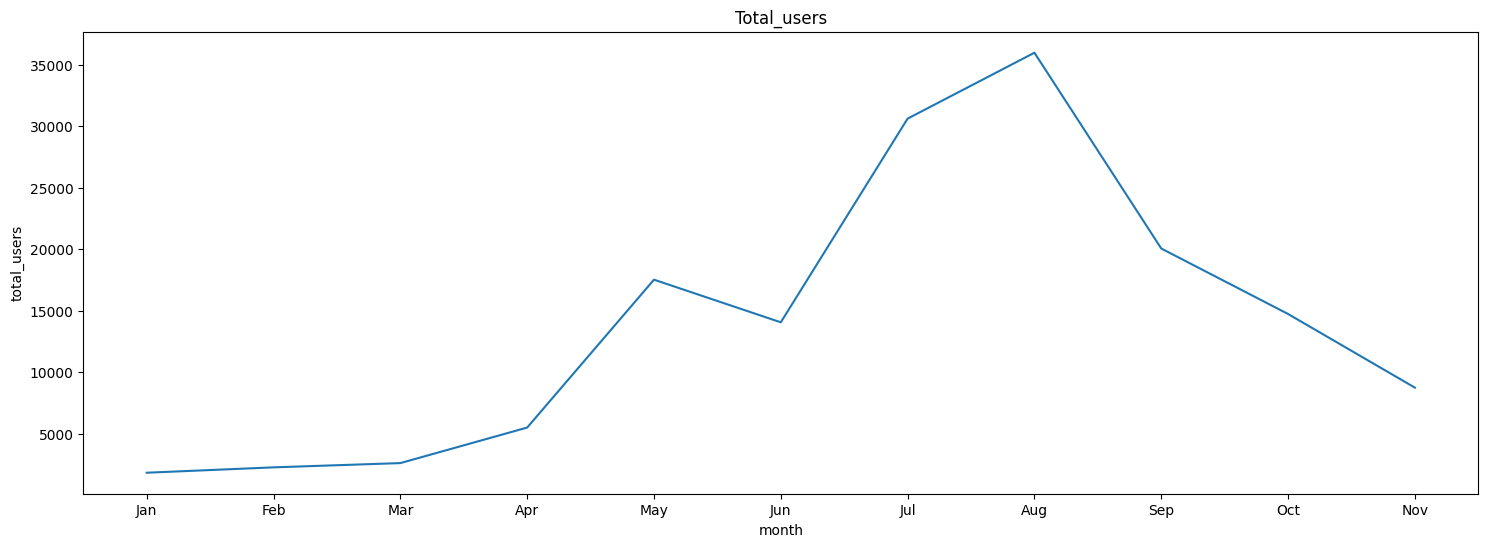

In [16]:
plt.figure(figsize=(18, 6))

xpoints = df_month.month
ypoints = df_month.total_users
plt.plot(xpoints, ypoints)
plt.xlabel('month')
plt.ylabel('total_users')
plt.title('Total_users')
plt.show()

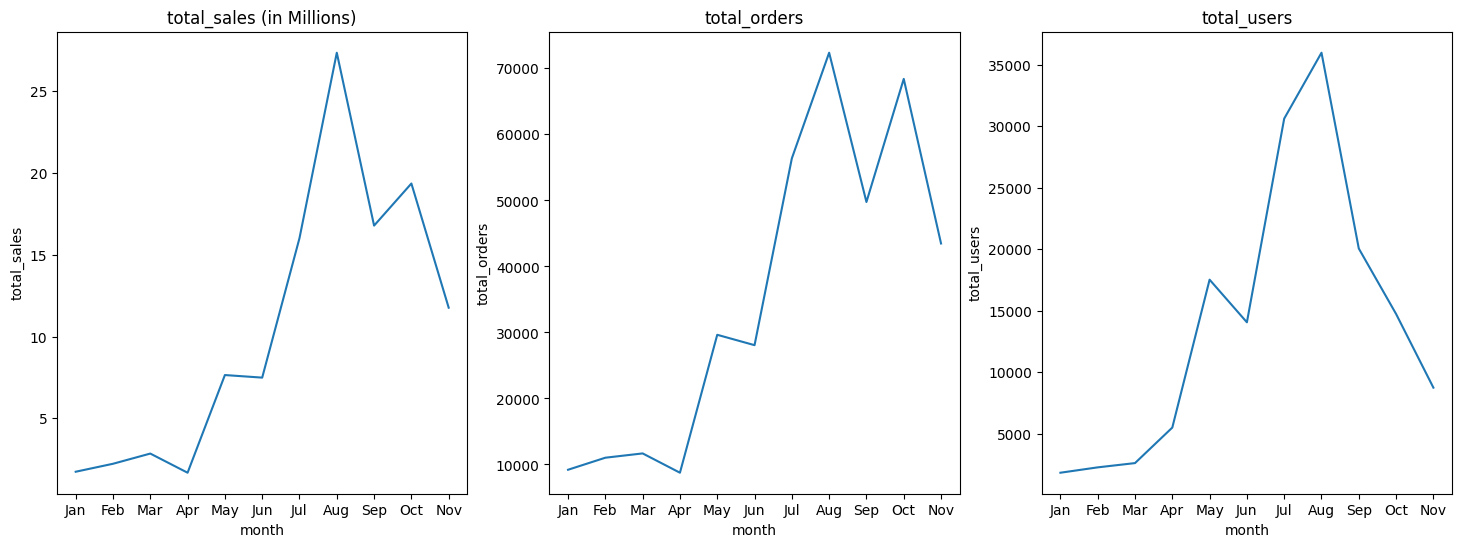

In [17]:
plt.figure(figsize=(18, 6))

for i, col in enumerate(df_month.columns):
    
    if col != 'month':

        fig = plt.subplot(1, 3, i)
        sns.lineplot(data=df_month, x='month', y=col, )
        plt.title(f'{col}')

        if col == 'total_sales':

            fig.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

            # after plotting the data, format the labels
            current_values = plt.gca().get_yticks() 

            plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000000) for x in current_values])
            plt.title(f'{col} (in Millions)')

plt.show()

In [18]:
df_date = data.groupby('date').agg(
    total_orders = ('order_id', 'nunique'),
    total_users = ('user_id', 'nunique'),
    total_sales = ('price', 'sum')
).sort_values(by='date', ascending = True).reset_index()
df_date

date  total_orders  total_users  total_sales
0   2020-01-05           426          105     77216.52
1   2020-01-06           411           89     61146.03
2   2020-01-07           497           99     82381.21
3   2020-01-08           300           62     56344.74
4   2020-01-09           319           83     58278.71
..         ...           ...          ...          ...
317 2020-11-17           711          542    274243.17
318 2020-11-18          5231         1076   1147987.30
319 2020-11-19          5012         1004   1124056.05
320 2020-11-20           573          485    266572.62
321 2020-11-21           250          225    117368.16

[322 rows x 4 columns]

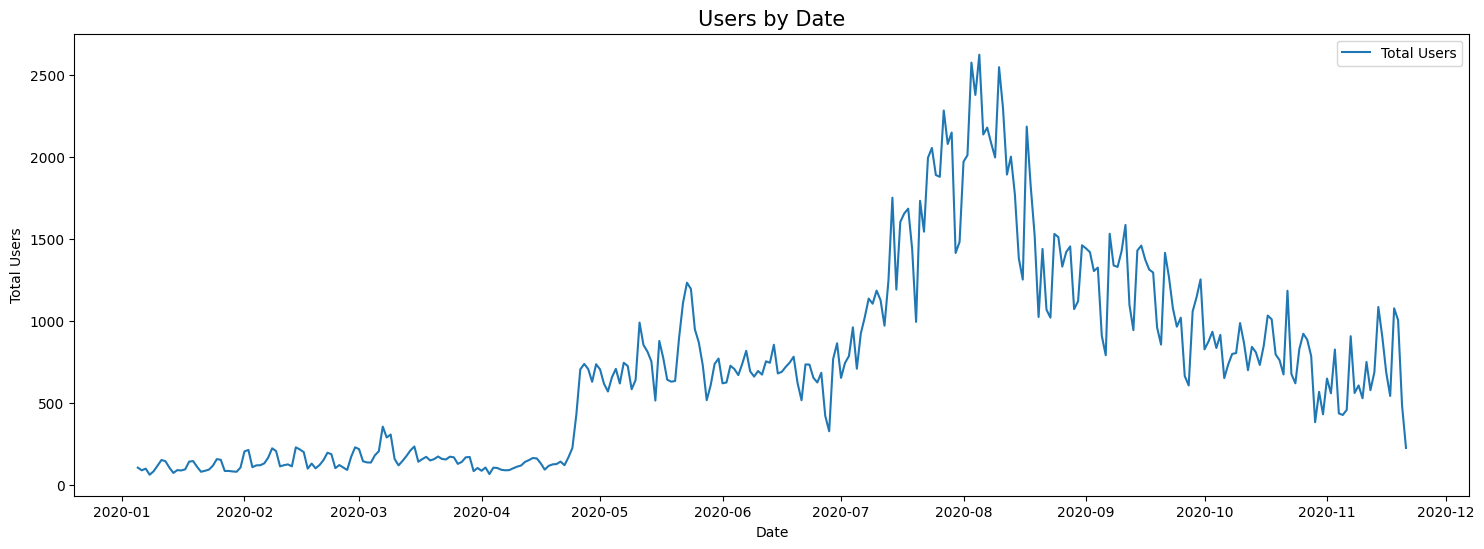

In [19]:
plt.figure(figsize=(18, 6))

xpoints = df_date['date']
ypoints = df_date['total_users']
plt.plot(xpoints, ypoints)
plt.xlabel('Date')
plt.ylabel('Total Users')
plt.legend(['Total Users'])
plt.title('Users by Date', fontsize=15)

plt.show()

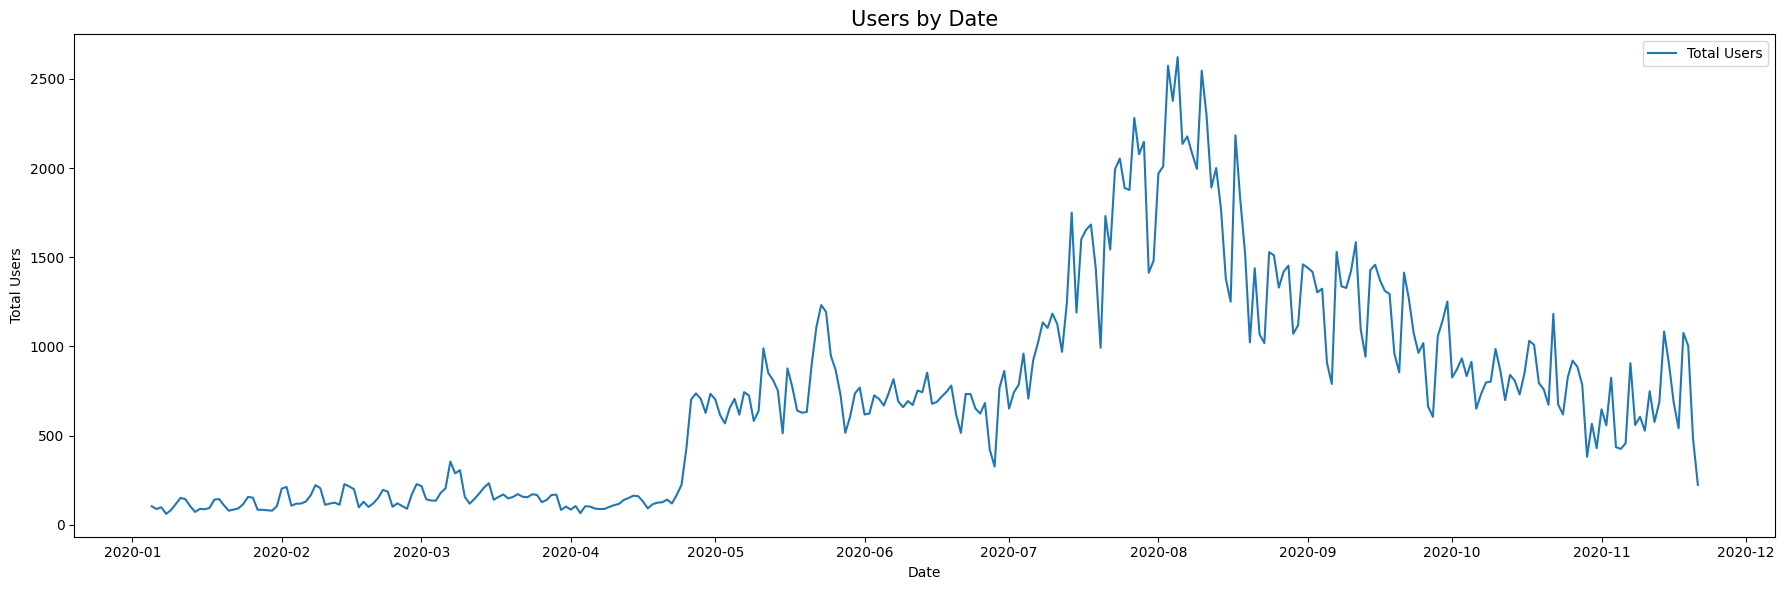

In [20]:
fig, ax = plt.subplots(figsize=(18, 6))
# fig = plt.figure()
# ax = fig.add_subplot(1, 1)
xticks = df_date.date

ax.plot(df_date['date'], df_date['total_users'])

ax.set_xlabel('Date')
ax.set_ylabel('Total Users')

ax.legend(['Total Users'])
plt.title('Users by Date', fontsize=15)

plt.tight_layout()
plt.show()

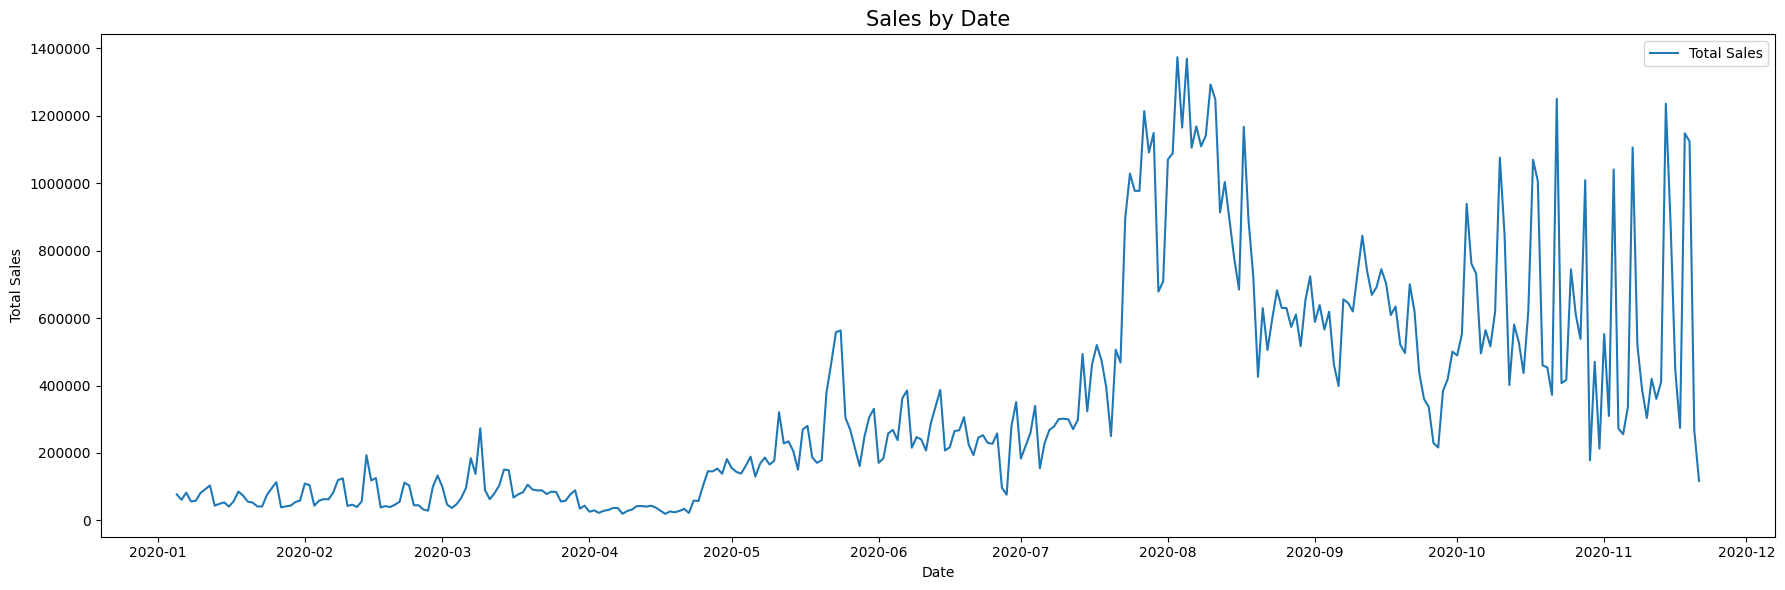

In [21]:
fig, ax = plt.subplots(figsize=(18, 6))
plt.ticklabel_format(style='plain')
xticks = df_date.date

ax.plot(df_date['date'], df_date['total_sales'])

ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')

ax.legend(['Total Sales'])
plt.title('Sales by Date', fontsize=15)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Total Orders vs Total Sales By Date')

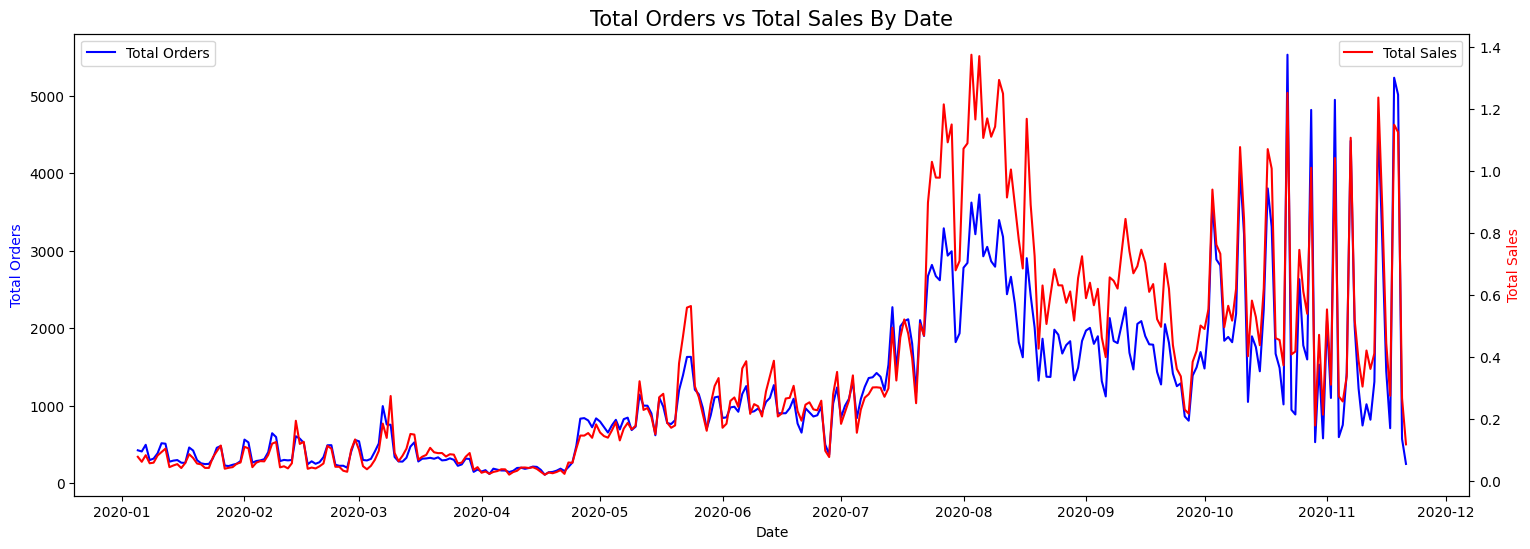

In [22]:
fig , ax1 = plt.subplots(figsize=(18,6))
# xticks = df_date.date

ax2 = ax1.twinx()
ax1.plot(df_date.date, df_date.total_orders, color='b')
ax2.plot(df_date.date, df_date.total_sales, color='r')

# format the second y-axis labels
ax2.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

current_values = plt.gca().get_yticks() 
plt.gca().set_yticklabels(['{:,.1f}'.format(x/1000000) for x in current_values])

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Orders', color='b')
ax2.set_ylabel('Total Sales',color='r')

ax1.legend(['Total Orders'], loc='upper left')
ax2.legend(['Total Sales'], loc='upper right')

plt.title('Total Orders vs Total Sales By Date', fontsize=15)

5. Customer Analysis


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535065 entries, 0 to 535064
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      535065 non-null  int64         
 1   product_id    535065 non-null  int64         
 2   category_id   535065 non-null  int64         
 3   brand         535065 non-null  object        
 4   price         535065 non-null  float64       
 5   user_id       535065 non-null  int64         
 6   category      535065 non-null  object        
 7   product       535065 non-null  object        
 8   date          535065 non-null  datetime64[ns]
 9   month         535065 non-null  object        
 10  month_num     535065 non-null  int32         
 11  week_day      535065 non-null  object        
 12  week_day_num  535065 non-null  int64         
 13  hour          535065 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(5)
memo

In [23]:
data.head()

order_id           product_id          category_id    brand  \
0  2294359932054536986  1515966223509089906  2268105426648171008  samsung   
1  2294444024058086220  2273948319057183658  2268105430162997760   huawei   
2  2294584263154074236  2273948316817424439  2268105471367840000  karcher   
3  2295716521449619559  1515966223509261697  2268105442636858112  maestro   
4  2295740594749702229  1515966223509104892  2268105428166509056    apple   

    price              user_id     category          product       date month  \
0  162.01  1515915625441993984  electronics           tablet 2020-04-24   Apr   
1   77.52  1515915625447879424  electronics  audio.headphone 2020-04-24   Apr   
2  217.57  1515915625443148032      unknown          unknown 2020-04-24   Apr   
3   39.33  1515915625450382848    furniture    kitchen.table 2020-04-26   Apr   
4 1387.01  1515915625448766464  electronics       smartphone 2020-04-26   Apr   

   month_num week_day  week_day_num  hour  
0          4      Fri             5    11  
1          4      Fri             5    14  
2          4      Fri             5    19  
3          4      Sun             0     8  
4          4      Sun             0     9

In [24]:
# Average Customer Spending 

avg_user_rev = round(data['price'].sum()/data['user_id'].nunique())
print(f'Average customer sales: {avg_user_rev: 0,}')

Average customer sales:  1,183


In [25]:
# Average Customer Orders 

avg_user_orders = round(data['order_id'].nunique()/data['user_id'].nunique(), 0)
print(f'Average customer orders: {avg_user_orders}')

Average customer orders: 4.0


In [26]:
# Average Order Value
avg_order_value = round(data['price'].sum()/data['order_id'].nunique(), 0)
print(f'Average customer orders: {avg_order_value}')

Average customer orders: 296.0


5.2 Top 10 Customers


In [27]:
#  Top 10 customers based on the number of orders 
top_10_customers = data.groupby('user_id').agg(
    total_orders = ('order_id', 'count'),
    total_sales = ('price', 'sum')
    ).sort_values(by='total_orders', ascending=False,)
top_10_customers.head(10)

total_orders  total_sales
user_id                                       
1515915625512763648           603    120965.01
1515915625512763904           597    109908.68
1515915625512422656           553     86242.12
1515915625512817152           551    101644.54
1515915625512118016           543     80672.60
1515915625512118784           533     65778.93
1515915625512155136           531     53172.39
1515915625512376576           530     60860.53
1515915625512084480           529     83895.33
1515915625512118272           529     70619.40

In [28]:

#  Top 10 customers based on the orders' value
top_10_customers = data.groupby('user_id').agg(
    total_orders = ('order_id', 'count'),
    total_sales = ('price', 'sum')
    ).sort_values(by='total_sales', ascending=False,)
top_10_customers.head(10)

total_orders  total_sales
user_id                                       
1515915625512763648           603    120965.01
1515915625512763904           597    109908.68
1515915625512817152           551    101644.54
1515915625512817408           519     94095.53
1515915625513695744           477     88957.45
1515915625512422656           553     86242.12
1515915625512084480           529     83895.33
1515915625512118016           543     80672.60
1515915625513284864           519     78927.92
1515915625512377344           502     78194.71

# 6 . Prodcut Analysis

In [29]:
data.head()


order_id           product_id          category_id    brand  \
0  2294359932054536986  1515966223509089906  2268105426648171008  samsung   
1  2294444024058086220  2273948319057183658  2268105430162997760   huawei   
2  2294584263154074236  2273948316817424439  2268105471367840000  karcher   
3  2295716521449619559  1515966223509261697  2268105442636858112  maestro   
4  2295740594749702229  1515966223509104892  2268105428166509056    apple   

    price              user_id     category          product       date month  \
0  162.01  1515915625441993984  electronics           tablet 2020-04-24   Apr   
1   77.52  1515915625447879424  electronics  audio.headphone 2020-04-24   Apr   
2  217.57  1515915625443148032      unknown          unknown 2020-04-24   Apr   
3   39.33  1515915625450382848    furniture    kitchen.table 2020-04-26   Apr   
4 1387.01  1515915625448766464  electronics       smartphone 2020-04-26   Apr   

   month_num week_day  week_day_num  hour  
0          4      Fri             5    11  
1          4      Fri             5    14  
2          4      Fri             5    19  
3          4      Sun             0     8  
4          4      Sun             0     9

In [30]:
data['category'].nunique()


14

In [31]:
# Category Ranking excluding Unknow 

orders_category = data[data['category'] != 'unknown'].groupby('category').agg(
  total_orders=('order_id', 'count')).reset_index().sort_values(
  'total_orders', ascending=False).reset_index(drop=True)

orders_category.head(10)

# Category Ranking including Unknow 

# orders_category = data.groupby('category').agg(
#     total_orders = ('order_id', 'count')
# )
# orders_category.sort_values('total_orders', ascending=False).reset_index(drop=True)

category  total_orders
0   electronics        156556
1    appliances        145217
2     computers         72378
3     furniture         21182
4    stationery          8676
5  construction          3959
6   accessories          3019
7       apparel          2664
8          kids          2275
9          auto          1366

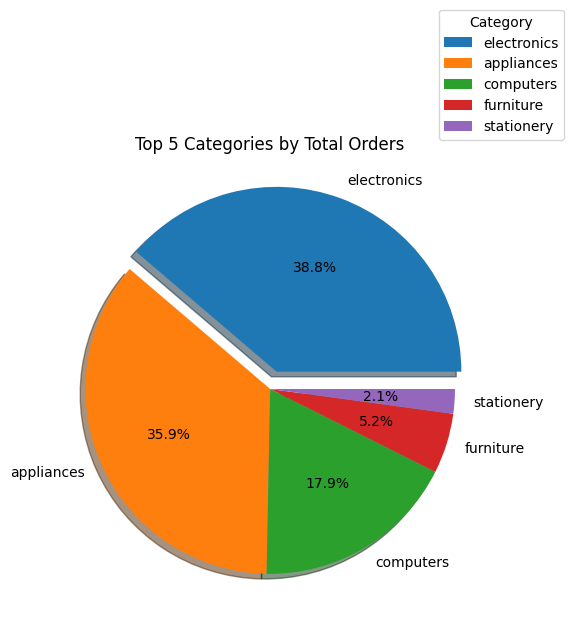

In [32]:
# top 5 categories by orders


fig , ax = plt.subplots(figsize=(6,6))
# fig = plt.figure()
# ax = fig.add_subplot(1, 1)
ax.pie(orders_category['total_orders'][:5],
       labels= orders_category['category'][:5],
       autopct='%1.1f%%',
       explode= (0.1, 0, 0, 0, 0), 
       shadow=True,
       )

plt.legend(orders_category['category'], title='Category',bbox_to_anchor=(0.85,1.025))
plt.title('Top 5 Categories by Total Orders')
plt.show()

In [33]:
# Category Ranking by sales

sales_category = data[data['category'] != 'unknown'].groupby('category').agg(
                    total_sales=('price', 'sum')).reset_index().sort_values(
                    'total_sales', ascending=False).reset_index(drop=True)

sales_category.head(10)

category  total_sales
0   electronics  56713685.46
1    appliances  27437259.95
2     computers  19242876.00
3     furniture   1022587.13
4       apparel    787574.36
5          kids    549690.68
6  construction    331910.78
7         sport    243893.92
8          auto    119889.08
9      medicine     70498.46

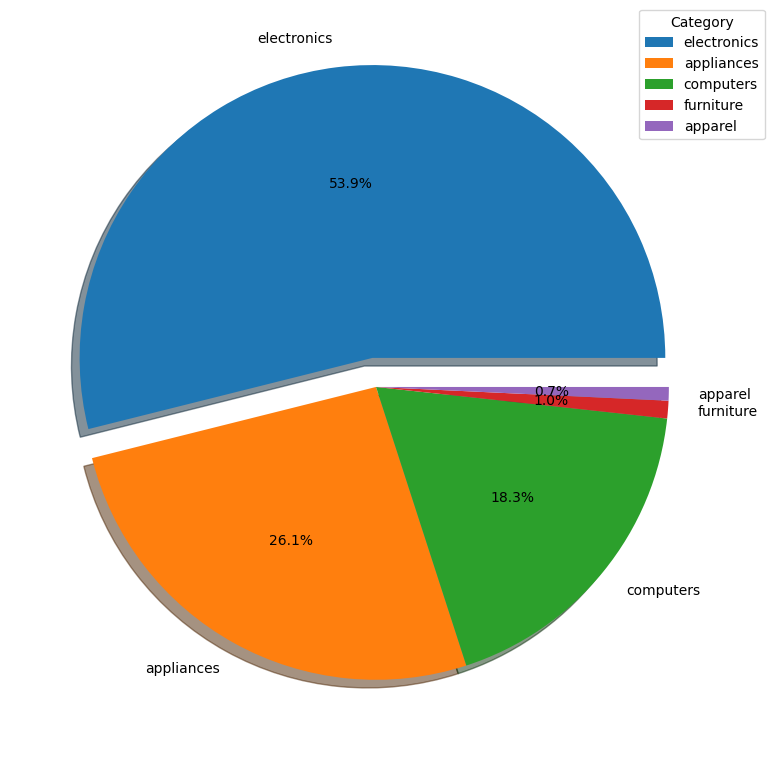

In [34]:
# 'Top 5 Categories By Sales'
fig , ax = plt.subplots(figsize=(8 ,8))

ax.pie(sales_category['total_sales'][:5],
       labels= sales_category['category'][:5],
       autopct='%1.1f%%',
       explode= (0.1, 0,0,0,0),
       shadow=True
       )

plt.legend(sales_category['category'], title='Category', bbox_to_anchor=(0.85,1.025) )
plt.title='Top 5 Categories By Total Sales'
plt.tight_layout()
plt.show()

6.2 Top 10 Brands


In [35]:
data.head()

order_id           product_id          category_id    brand  \
0  2294359932054536986  1515966223509089906  2268105426648171008  samsung   
1  2294444024058086220  2273948319057183658  2268105430162997760   huawei   
2  2294584263154074236  2273948316817424439  2268105471367840000  karcher   
3  2295716521449619559  1515966223509261697  2268105442636858112  maestro   
4  2295740594749702229  1515966223509104892  2268105428166509056    apple   

    price              user_id     category          product       date month  \
0  162.01  1515915625441993984  electronics           tablet 2020-04-24   Apr   
1   77.52  1515915625447879424  electronics  audio.headphone 2020-04-24   Apr   
2  217.57  1515915625443148032      unknown          unknown 2020-04-24   Apr   
3   39.33  1515915625450382848    furniture    kitchen.table 2020-04-26   Apr   
4 1387.01  1515915625448766464  electronics       smartphone 2020-04-26   Apr   

   month_num week_day  week_day_num  hour  
0          4      Fri             5    11  
1          4      Fri             5    14  
2          4      Fri             5    19  
3          4      Sun             0     8  
4          4      Sun             0     9

In [234]:
Brands  = data['brand'].nunique()
Brands 

866

In [36]:
df_brand = data.groupby('brand').agg(
    total_orders = ('order_id', 'nunique'),
    total_users = ('user_id', 'nunique'),
    total_sales = ('price', 'sum')
).reset_index().sort_values('total_sales', ascending=False).reset_index(drop=True)

df_brand.head(10)

brand  total_orders  total_users  total_sales
0  samsung         84685        35633  28890299.34
1    apple         34257        18762  25929970.87
2       lg         15572         8381   7796270.97
3     asus          8945         5711   5074716.53
4   lenovo          7853         4863   4582558.86
5    bosch          8419         4752   3338757.25
6       hp          6004         3936   2496689.33
7   xiaomi         14413         9107   2390952.57
8   huawei          9860         5722   2218195.42
9     beko          7300         4959   2061907.61

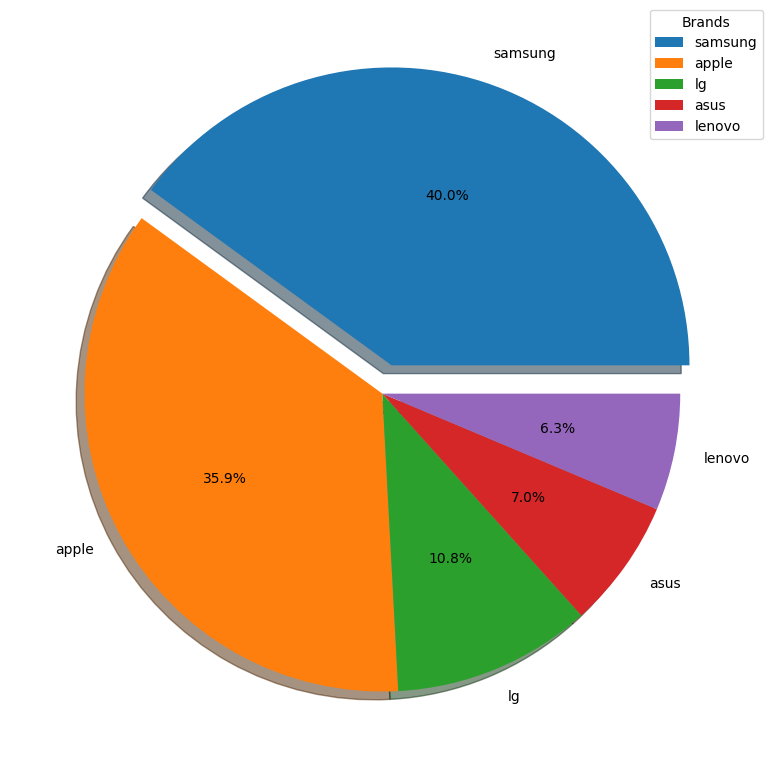

In [37]:
# Top 5 brand by sales 
fig , ax = plt.subplots(figsize=(8,8))

ax.pie(df_brand['total_sales'][:5],
       labels=df_brand['brand'][:5],
       autopct='%1.1f%%',
       explode=(0.1, 0,0,0,0),
       shadow=True
        )

plt.legend(df_brand['brand'], title='Brands',  bbox_to_anchor=(0.85,1.025)),
plt.title='Top 5 brands by Total sales'
plt.tight_layout()
plt.show()

6.3 Top 10 Products


In [38]:
print('Unique products: ', data['product'].nunique())
print('Total products sold: ', data['product_id'].nunique())

Unique products:  124
Total products sold:  19053


In [39]:
df_product = data.groupby(['product', 'brand']).agg(
                total_users=('user_id', 'nunique'),
                total_orders=('order_id', 'nunique'),
                total_sales=('price', 'sum')).reset_index(). \
                sort_values(by='total_sales', ascending=False). \
                    reset_index(drop=True)

df_product.head(10)

product    brand  total_users  total_orders  total_sales
0             smartphone    apple        13795         23043  19163221.51
1             smartphone  samsung        23627         47792  16203110.72
2               notebook     asus         4832          7486   4699457.65
3               notebook   lenovo         4593          7430   4507154.41
4               video.tv  samsung         3640          6080   3903495.59
5               notebook    apple         1456          2249   3292571.10
6               video.tv       lg         3323          5533   3282657.46
7  kitchen.refrigerators  samsung         1995          2973   2191618.54
8         kitchen.washer  samsung         2956          4998   2058715.88
9         kitchen.washer       lg         3262          5327   1950491.25

In [40]:
df_product_clean = data[data['product'] != 'unknown'].groupby('product').agg(
                total_users=('user_id', 'nunique'),
                total_orders=('order_id', 'nunique'),
                total_sales=('price', 'sum')).reset_index(). \
                sort_values(by='total_sales', ascending=False). \
                    reset_index(drop=True)

df_product_clean.head(10)

product  total_users  total_orders  total_sales
0                   smartphone        41985         94980  41177570.76
1                     notebook        12775         24617  14774573.47
2                     video.tv         8645         17162   8716817.96
3        kitchen.refrigerators        10249         19248   8594453.16
4               kitchen.washer         7193         13865   4917272.74
5           environment.vacuum         7450         15427   2435306.62
6                       tablet         4144          6279   2340078.84
7                       clocks         3894          6197   2178261.94
8  environment.air_conditioner         4923          6933   1822777.41
9                 kitchen.hood         3840          6959   1796502.32

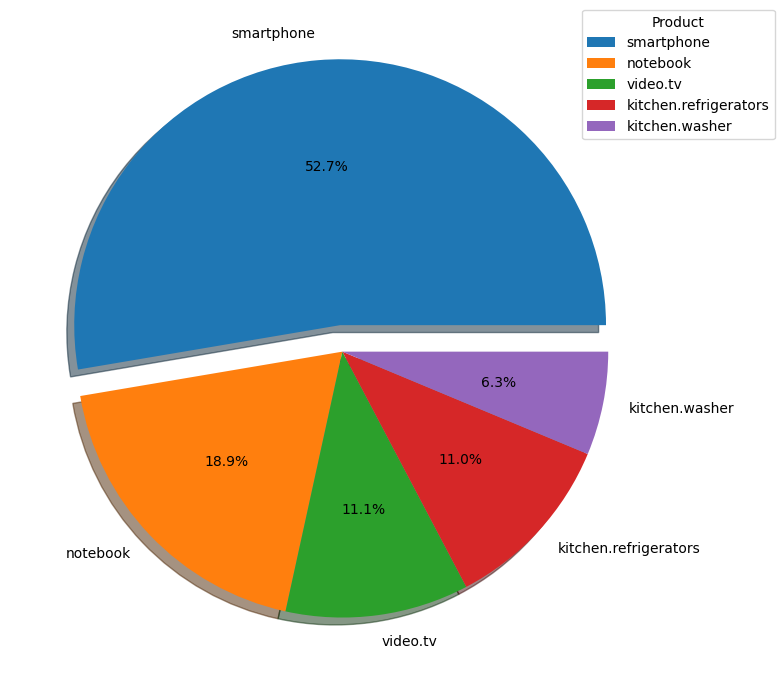

In [41]:
# top 5 products by sales
fig, ax = plt.subplots(figsize=(8,8))

ax.pie(df_product_clean['total_sales'][:5],
       labels= df_product_clean['product'][:5],
       autopct='%1.1f%%',
       explode= (0.1, 0,0,0,0),
       shadow=True
       )
plt.legend (df_product_clean['product'][:5], title='Product',  bbox_to_anchor=(0.85,1.025))
plt.title = 'Top 5 products by sales'
plt.tight_layout()
plt.show()


6.4 Top 5 Selling SmartPhone Brands


In [42]:
df_smartphone = data[data['product']=='smartphone'].groupby('brand').agg(
    
    total_sales=('price', 'sum'),
    total_users=('user_id', 'nunique'),
    total_orders=('order_id', 'nunique'),
    ).reset_index().sort_values('total_sales', ascending=False).reset_index(drop=True)

df_smartphone.head(10)

brand  total_sales  total_users  total_orders
0    apple  19163221.51        13795         23043
1  samsung  16203110.72        23627         47792
2   huawei   1881632.04         4480          7386
3     oppo   1678580.92         3275          6555
4   xiaomi   1634833.59         5470          8081
5    honor    334943.48         1353          1894
6     vivo    165235.11          613           783
7     sony     82766.32          375           513
8    nokia     12167.57          119           129
9       lg      9606.48            1             1

In [43]:
# Eventhough apple's total order is 50% less than Samsung's total order but apple has generate higher revenue than Samsung

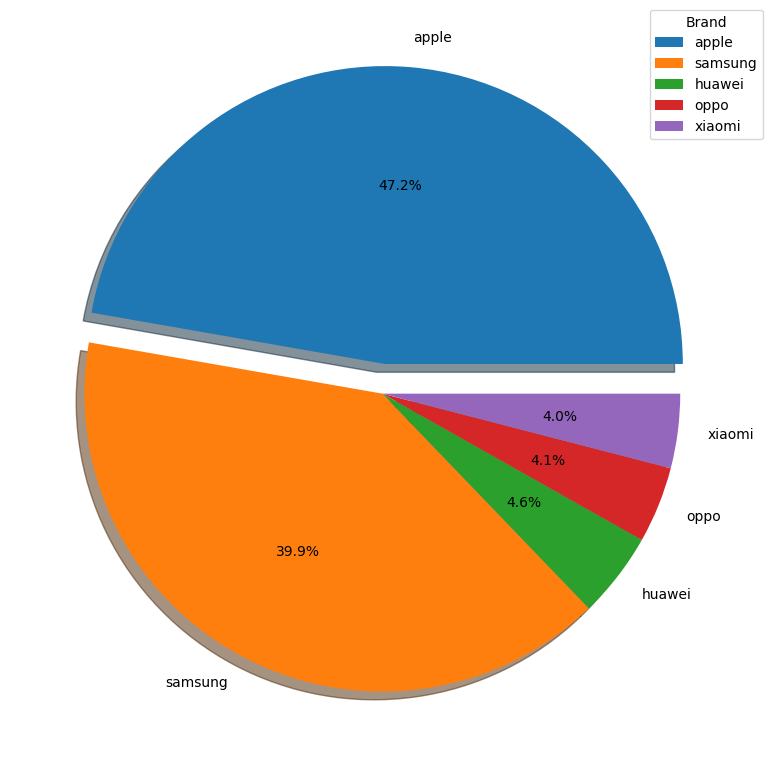

In [280]:
# top 5 smart phone brands by total sales

fig , ax = plt.subplots(figsize=(8,8))

ax.pie(df_smartphone['total_sales'][:5],
       labels= df_smartphone['brand'][:5],
       explode=(0.1, 0,0,0,0),
       autopct='%1.1f%%',
       shadow=True
       )

plt.legend(df_smartphone['brand'], title='Brand', bbox_to_anchor=(0.85,1.025)),
plt.title = 'Top 5 smart phone brands by total sales'
plt.tight_layout()
plt.show()

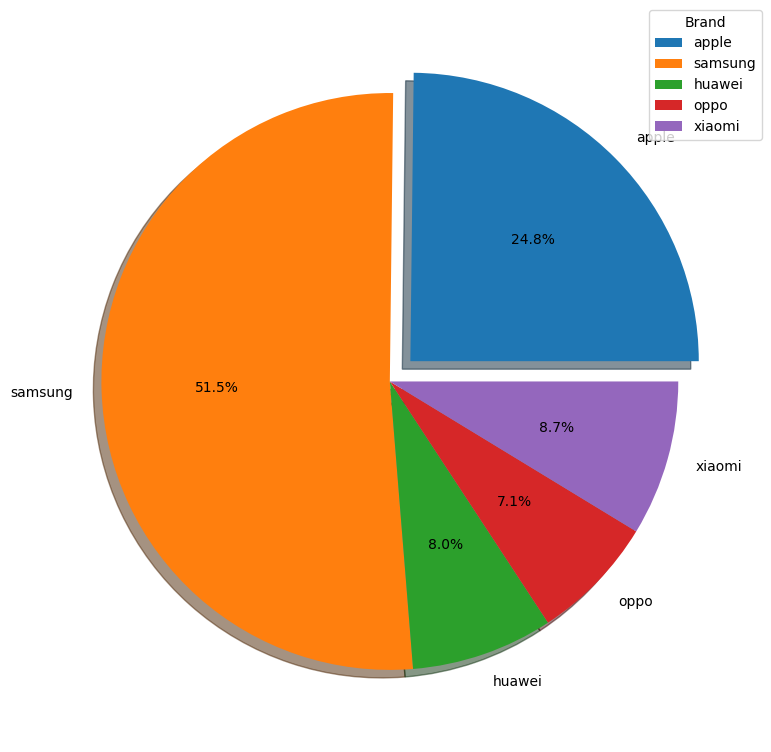

In [44]:
# Top 5 smart phones by total orders

fig , ax = plt.subplots(figsize=(8,8))

ax.pie(df_smartphone['total_orders'][:5],
       labels= df_smartphone['brand'][:5],
       explode=(0.1, 0,0,0,0),
       autopct='%1.1f%%',
       shadow=True
       )

plt.legend(df_smartphone['brand'], title='Brand', bbox_to_anchor=(0.85,1.025)),
plt.title = 'Top 5 smart phone brands by total sales'
plt.tight_layout()
plt.show()

# 7. RFM Analysis

- Recency: How recently a customer has made a purchase
- Frequency: How often a customer makes a purchase
- Monetary value: How much money a customer spends on purchases


In [45]:
data.describe()

order_id             product_id            category_id  \
count              535065.00              535065.00              535065.00   
mean  2370567694359658496.00 1692647560995175168.00 2273071589655354368.00   
min   2294359932054536960.00 1515966223509088512.00 2268105388421284352.00   
25%   2354295804434317824.00 1515966223509104896.00 2268105406549066752.00   
50%   2376796926830969856.00 1515966223509261824.00 2268105428166509056.00   
75%   2388440981134596608.00 1515966223527326208.00 2268105439323357952.00   
max   2388440981134693888.00 2388434452476881920.00 2374498914001945600.00   
std     20233627030308216.00  327307231759143808.00   21897673743826316.00   

          price                user_id                           date  \
count 535065.00              535065.00                         535065   
mean     214.71 1515915625486156800.00  2020-08-07 01:08:19.383812608   
min        0.00 1515915625439952128.00            2020-01-05 00:00:00   
25%       24.98 1515915625466993664.00            2020-06-28 00:00:00   
50%       99.51 1515915625486697984.00            2020-08-16 00:00:00   
75%      289.33 1515915625511534592.00            2020-10-09 00:00:00   
max    11574.05 1515915625514891264.00            2020-11-21 00:00:00   
std      306.01            23777743.94                            NaN   

       month_num  week_day_num      hour  
count  535065.00     535065.00 535065.00  
mean        7.73          3.03      9.54  
min         1.00          0.00      0.00  
25%         6.00          1.00      6.00  
50%         8.00          3.00      9.00  
75%        10.00          5.00     12.00  
max        11.00          6.00     23.00  
std         2.54          2.04      4.19

In [46]:
# Frequency & Monetary on Average Purchase
data.groupby('user_id').agg(
    {'order_id':'nunique', 'price':'sum', 'date':'nunique'}
).describe([0.25, 0.5, 0.75, 0.99]).T


count    mean     std  min    25%    50%     75%      99%  \
order_id 97098.00    4.00   16.01 1.00   1.00   2.00    3.00    34.00   
price    97098.00 1183.15 3767.09 0.00 138.87 428.22 1085.49 12464.88   
date     97098.00    2.42    4.32 1.00   1.00   1.00    2.00    17.00   

               max  
order_id    392.00  
price    120965.01  
date        117.00

Summary:

- Median value : about 50% of the customers made two purchases.
- Mean value : on average, customers made 4.0 purchases. (Average Number of Orders per Customer or Purchase Frequency)

- Median value : about 50% of the customers spent about $428.
- Mean value: On average, customers spent abount $1,184. (Average Revenue per Customer ARPC).That means customers above the 75th percentile spent more than the average.

- The average of 2.42 unique dates per user indicates that, on average,
each user engaged with the store on approximately 2.42 different days.


# Calculate RFM Values


In [47]:
customer_rfm = data.groupby('user_id').agg(
    last_purchase = ('date', 'max'),
    Frequency = ('order_id', 'nunique'),
    Monetary = ('price', 'sum')
).reset_index()

print(customer_rfm.head())
print(customer_rfm.shape)

               user_id last_purchase  Frequency  Monetary
0  1515915625439952128    2020-07-09          1    416.64
1  1515915625440038400    2020-10-28          2     56.43
2  1515915625440051456    2020-11-16          4   7489.53
3  1515915625440099840    2020-11-08         16   4790.99
4  1515915625440121600    2020-07-14          2    182.83
(97098, 4)


In [49]:
customer_rfm['Recency'] = customer_rfm['last_purchase'].apply(
    lambda x: customer_rfm['last_purchase'].max() - x ).dt.days

customer_rfm = customer_rfm[['user_id', 'Recency', 'Frequency', 'Monetary']]
customer_rfm.head()

user_id  Recency  Frequency  Monetary
0  1515915625439952128      135          1    416.64
1  1515915625440038400       24          2     56.43
2  1515915625440051456        5          4   7489.53
3  1515915625440099840       13         16   4790.99
4  1515915625440121600      130          2    182.83

In [50]:
customer_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97098 entries, 0 to 97097
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    97098 non-null  int64  
 1   Recency    97098 non-null  int64  
 2   Frequency  97098 non-null  int64  
 3   Monetary   97098 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 3.0 MB


In [51]:
customer_rfm['user_id'] = customer_rfm['user_id'].astype('object')
customer_rfm.describe(percentiles=[0.25, 0.50, 0.75, 0.99]).T

count    mean     std  min    25%    50%     75%      99%  \
Recency   97098.00   99.26   54.64 0.00  61.00 102.00  128.00   212.00   
Frequency 97098.00    4.00   16.01 1.00   1.00   2.00    3.00    34.00   
Monetary  97098.00 1183.15 3767.09 0.00 138.87 428.22 1085.49 12464.88   

                max  
Recency      321.00  
Frequency    392.00  
Monetary  120965.01

Summary:

Recency (days since last purchase):

- The Mean value - 99 days
- The Median value - 102 days

Frequency:

- The Mean value - 4 times
- The Median value - 2 times

Monetary values:

- The Mean value - 1,183
- The Median value - 428

# 7.4 Customer Segmentation


In [52]:
rfm = customer_rfm.copy()
rfm.head()

user_id  Recency  Frequency  Monetary
0  1515915625439952128      135          1    416.64
1  1515915625440038400       24          2     56.43
2  1515915625440051456        5          4   7489.53
3  1515915625440099840       13         16   4790.99
4  1515915625440121600      130          2    182.83

In [53]:
# scale of 1 to 7 (the higher the number, the better the result)
# The higher the customer ranking, the more likely it is that they will make another purchace again.

recency_scores = [7, 6, 5, 4, 3, 2, 1]    # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5, 6,7]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5,6,7]   # Higher score for higher monetary value

# Calculate RFM scores
rfm['RecencyScore'] = pd.cut(rfm['Recency'], bins=7, labels=recency_scores).astype('Int64')
rfm['FrequencyScore'] = pd.cut(rfm['Frequency'], bins=7, labels=frequency_scores).astype('Int64')
rfm['MonetaryScore'] = pd.cut(rfm['Monetary'], bins=7, labels=monetary_scores).astype('Int64')

rfm.value_counts()

user_id              Recency  Frequency  Monetary  RecencyScore  FrequencyScore  MonetaryScore
1515915625439952128  135      1          416.64    5             1               1                1
1515915625493903360  78       3          1109.84   6             1               1                1
1515915625493909504  108      1          173.59    5             1               1                1
1515915625493908736  122      1          138.87    5             1               1                1
1515915625493908480  123      2          370.55    5             1               1                1
                                                                                                 ..
1515915625463404800  177      2          601.78    4             1               1                1
1515915625463404288  163      1          166.39    4             1               1                1
1515915625463402752  183      1          49.75     4             1               1                1
15159

In [56]:
# Calculate RFM score by combining the individual scores
rfm['RFM_Score'] = rfm['RecencyScore'] + rfm['FrequencyScore'] + rfm['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Potential', 'Mid-Value', 'Promising', 'High-Value']
rfm['CustomerSegment'] = pd.qcut(rfm['RFM_Score'], q=6, labels=segment_labels, duplicates='drop')

rfm.head()

user_id  Recency  Frequency  Monetary  RecencyScore  \
0  1515915625439952128      135          1    416.64             5   
1  1515915625440038400       24          2     56.43             7   
2  1515915625440051456        5          4   7489.53             7   
3  1515915625440099840       13         16   4790.99             7   
4  1515915625440121600      130          2    182.83             5   

   FrequencyScore  MonetaryScore  RFM_Score CustomerSegment  
0               1              1          7       Potential  
1               1              1          9       Promising  
2               1              1          9       Promising  
3               1              1          9       Promising  
4               1              1          7       Potential

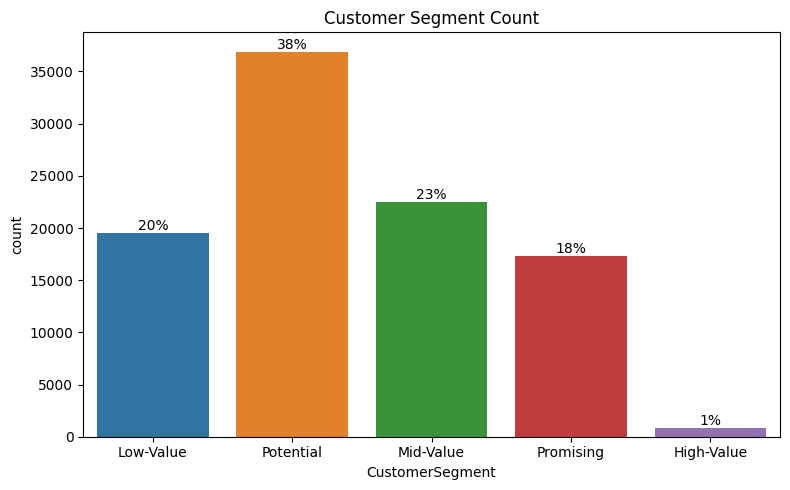

In [60]:
# plot the segment variable
fig, ax = plt.subplots(figsize=(8, 5))
# fig = plt.figure()
# ax = fig.add_subplot(1, 1)

ax = sns.countplot(data=rfm, x=rfm['CustomerSegment'], ax=ax)

# add annotations
for c in ax.containers:
    labels=[f'{x:.0%}' for x in (c.datavalues / rfm.CustomerSegment.count())]
    ax.bar_label(c, labels=labels, label_type='edge')

ax.set_title('Customer Segment Count')

plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

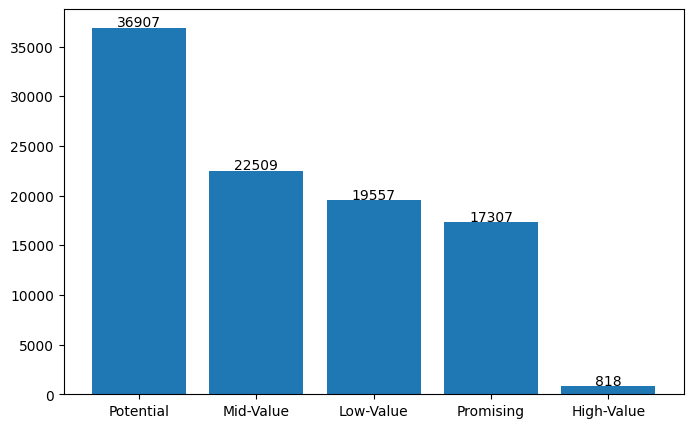

In [65]:
plt.figure(figsize=(8, 5))

plt.bar(rfm['CustomerSegment'].value_counts().index, rfm['CustomerSegment'].value_counts().values)

for x, y in enumerate(rfm['CustomerSegment'].value_counts()):
    plt.text(x, y+100, y, ha='center')

plt.title('Customer Segmentation')
plt.show()

In [66]:
pd.Series(rfm['CustomerSegment'].value_counts())


CustomerSegment
Potential     36907
Mid-Value     22509
Low-Value     19557
Promising     17307
High-Value      818
Name: count, dtype: int64

TypeError: 'str' object is not callable

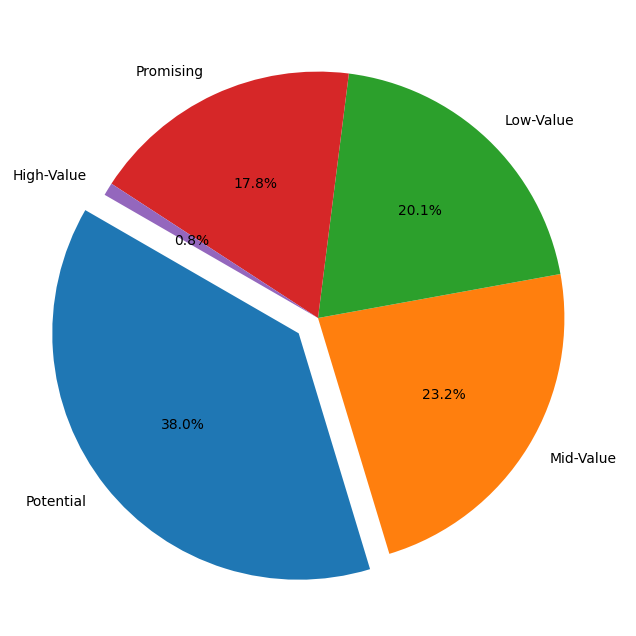

In [67]:
### Plot the pie plot for customer segmentss

# extract the segments as labels
# labels = rfm['CustomerSegment'].unique().tolist()
labels = rfm['CustomerSegment'].value_counts().index

# only "explode" the 1st slice 
explode = (0.1, 0, 0, 0, 0)  

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(x=rfm.CustomerSegment.value_counts().values, explode=explode, 
       labels=labels, autopct='%1.1f%%', startangle=150)

plt.title('Customer Segments')

plt.tight_layout()
plt.show()

In [68]:
from mpl_toolkits import mplot3d
import plotly.express as px
from plotly.offline import init_notebook_mode
from matplotlib.colors import ListedColormap

init_notebook_mode(connected=True)
# This allows the use of Plotly's visualization features in the notebook 
# without having to connect to the Plotly cloud service.

In [69]:
# Creating figure
fig = px.scatter_3d(data_frame=rfm, color='CustomerSegment',
                    x='Recency' , y='Frequency', 
                    z='Monetary')

fig.update_layout(width=1000, height=600)
fig.update_coloraxes(showscale=False)

# fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show('png') # on Github
fig.show()

7.5 Segment Exploration¶


In [70]:
# Calculate the overall means
overall_mean = rfm.drop(columns=['user_id', 'CustomerSegment'])[['Recency', 'Frequency', 
                                               'Monetary', 'RFM_Score']].mean().to_frame().T

overall_mean

Recency  Frequency  Monetary  RFM_Score
0    99.26       4.00   1183.15       7.34

In [71]:
# Calculate segment means
segment_mean = rfm.groupby('CustomerSegment')[['Recency', 'Frequency', 
                                               'Monetary', 'RFM_Score']].mean()

segment_mean

Recency  Frequency  Monetary  RFM_Score
CustomerSegment                                         
Low-Value         179.79       1.44    368.64       5.52
Potential         112.30       2.16    712.73       7.00
Mid-Value          70.69       3.24   1106.97       8.00
Promising          21.94       4.89   1647.49       9.00
High-Value          7.64     150.70  34152.78      12.67

In [72]:
# Concatenate the two frames
df_means = pd.concat([segment_mean, overall_mean], axis=0).reset_index()

df_means = df_means.rename(columns={'index': 'SegmentMeans'})
df_means.loc[df_means['SegmentMeans'] == 0, 'SegmentMeans'] = 'Overall'
df_means

SegmentMeans  Recency  Frequency  Monetary  RFM_Score
0    Low-Value   179.79       1.44    368.64       5.52
1    Potential   112.30       2.16    712.73       7.00
2    Mid-Value    70.69       3.24   1106.97       8.00
3    Promising    21.94       4.89   1647.49       9.00
4   High-Value     7.64     150.70  34152.78      12.67
5      Overall    99.26       4.00   1183.15       7.34

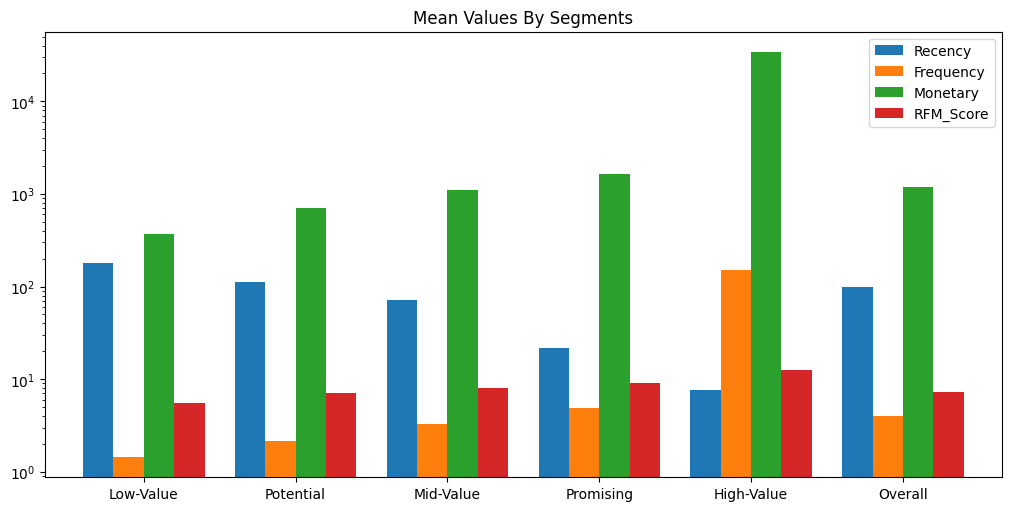

In [73]:
fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))

# labels = ['Low-Value', 'Potential', 'Mid-Value', 
#           'Promising', 'High-Value', 'Overall Mean']
labels = df_means.SegmentMeans.values

fig = df_means.plot(kind='bar', logy=True, width=0.8, ax=ax)

ax.set_title('Mean Values By Segments')
ax.set_xticklabels(labels=labels, rotation=0)

plt.show()

Observations:

- While Recency decreases from the low-end customers up to the high-end customers,
Frequency, Monetary as well as the RFM Score are in the opposite directions.
- That is an indication that our RFM model performs well in classifying customers.